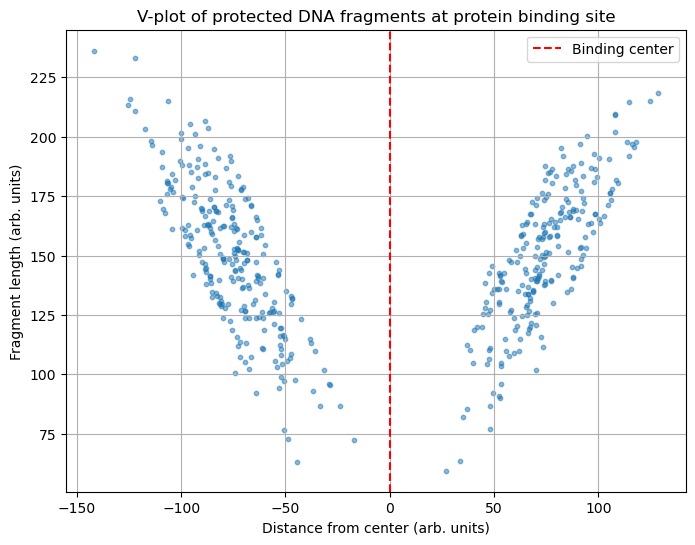

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def extract_dna_phosphates(pdb_filename):
    phosphates = []
    with open(pdb_filename, 'r') as file:
        for line in file:
            if line.startswith('ATOM'):
                atom_name = line[12:16].strip()
                res_name = line[17:20].strip()
                if atom_name == 'P' and res_name in {'DA', 'DT', 'DG', 'DC'}:
                    x = float(line[30:38])
                    y = float(line[38:46])
                    z = float(line[46:54])
                    phosphates.append((x, y, z))
    return np.array(phosphates)

def calculate_1d_projection(coords):
    # Project 3D coordinates to 1D by distance along main DNA axis
    # (Here simply using x-axis for simplicity)
    return coords[:, 0]  # taking X coordinate as 1D projection

def simulate_fragments(p_positions, num_fragments=500):
    center = np.median(p_positions)
    fragment_starts = np.random.choice(p_positions, size=num_fragments)
    fragment_lengths = np.abs(np.random.normal(loc=150, scale=30, size=num_fragments))
    fragment_ends = fragment_starts + np.random.choice([-1, 1], size=num_fragments) * fragment_lengths
    return fragment_starts, fragment_ends, center

def plot_v_formation(fragment_starts, fragment_ends, center):
    midpoints = (fragment_starts + fragment_ends) / 2
    lengths = np.abs(fragment_ends - fragment_starts)

    plt.figure(figsize=(8, 6))
    plt.scatter(midpoints - center, lengths, alpha=0.5, s=10)
    plt.xlabel('Distance from center (arb. units)')
    plt.ylabel('Fragment length (arb. units)')
    plt.title('V-plot of protected DNA fragments at protein binding site')
    plt.axvline(x=0, color='red', linestyle='--', label='Binding center')
    plt.legend()
    plt.grid(True)
    plt.show()

# === MAIN WORKFLOW ===

# 1. Extract P atoms (phosphate positions)
pdb_file = "C:/Users/ADARSH VERMA/Downloads/2r5z.pdb"
phosphates = extract_dna_phosphates(pdb_file)

# 2. Project to 1D
p_positions = calculate_1d_projection(phosphates)

# 3. Simulate fragments
fragment_starts, fragment_ends, center = simulate_fragments(p_positions)

# 4. Plot V-formation
plot_v_formation(fragment_starts, fragment_ends, center)
